In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('master.csv')
data.drop_duplicates()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


#### Utilizamos la función describe para tener una primera interpretación general de los datos. Aún no sabemos cuáles serán los datos más significativos del dataset, a parte de los obvios, número de suicidios y número de suicidios por cada 100k habitantes.
#### La hipótesis que propusimos para este proyecto consistía en la refutación de la afirmación de que aquellos países con un PIB alto también tenían una tasa de suicidios alta. Esta hipótesis es un poco vaga, y hemos decidido ampliar la búsqueda, queremos encontrar cuales son las causas de que en un país haya más suicidios que en otros, o al menos descartar cuales no son causas comunes.
#### Creemos que los países son una frontera perfecta, cada país tiene unas características propias de diferentes formas de vida de una población, debido a los diferentes índices de desarrollo personal, el PIB, el número de habitantes... estos atributos definen de en parte la forma de vida en un país. En este datase encontramos 101 países, los cuales la mayoría son europeos y americanos.
#### Vamos a hacer una breve descripción de los datos:

-  	Población: en primer lugar, encontramos que la población varía mucho entre unos países y otros, vemos que el país con menos habitantes es kiribati con menos de 4000 habitantes, por otro lado, EEUU con más de 260 millones de habitantes.
-   Country: país
-	Year: periodo de años, abarca de 1985 a 2015
-	country-year: esta columna se compone de el nombre del país y el año, pero
-	Sexo: hombre o mujer
-	gdp_for_year: es el PIB de un país de un año.
-	GDP_per_capita: PIB dividido por la población estimada para mediados del mismo año.
-	HDI for year: es el Índice de desarrollo humano por año.
-	Generation: encontramos las siguientes generaciones:
	  - G.I. Generation
	  - Silent
	  - Boomers
	  - Generación X
	  - Millenials
      - Generación Z
-	Age: dividimos las edades en cuatro grupos:
	  - 5-14
	  - 15-24
	  - 25-34
	  - 35-54
	  - 55-74
      - 75+
-	suicides_no: número de suicidios.
-	suicides/100k pop: número de suicidios por cada 100.000 habitantes.

- suicides/100k pop: número de suicidios por cada 100.000 habitantes.

In [3]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


#### Hemos considerado que sería una buena práctica hacer un análisis de los datos antes de emplear alguno de los algoritmos que hemos aprendido en la asignatura.


In [4]:
data['suicides/100k pop'].max()

224.97

##### En primer lugar, vamos a averiguar cuáles son los países con mayor media de índice de suicidios cada 100k de personas. Queremos ver si existe algún patrón en lo países dependiendo de este índice. Podrían darse más suicidios dependiendo del clima, o del tipo de sociedad o gobierno, que son datos que no forman parte del dataset.

In [5]:
dfMediaSuicidosPorPaises = data.groupby('country')['suicides/100k pop'].mean()

## Estudio Países con mayor índice de suicidio
##### Aquí podemos ver un gráfico de barras con los 20 países con mayor media de suicidios por cada 100k. Observamos que esta lista es sorprendentemente parecida a los datos que ofrece la OMS, estos datos utilizan fuentes también parecidas a nuestro dataset, los años abarcan de 1985 a 2018.
##### Vemos que muchos de estos países formaron parte de la URSS o al menos debieron adoptar políticas impuestas por la Unión Soviética, lamentablemente al comenzar nuestro dataset en 1985 no podemos asegurar que tenga que ver, ya que no sabemos si los años predecesores tienen índices menores o mayores, o si empeoró debido al gran colapso económico en 1980.
##### Otro grupo que podemos reconocer son los países asiáticos como República de Corea, Japón, o Sri Lanka. Estos países, al igual que los primeros, coinciden en que todos tienen un modelo social muy rígido y jerarquizado, donde hay no cabida a las decisiones individuales. Son modelos de vida patriarcales donde se impone al individuo las decisiones del padre de familia.
##### Por otro lado, también encontramos otro grupo de países que no sabemos muy bien el porqué de ese índice tan alto de suicidios, entre los que se encuentran Francia y Bélgica.

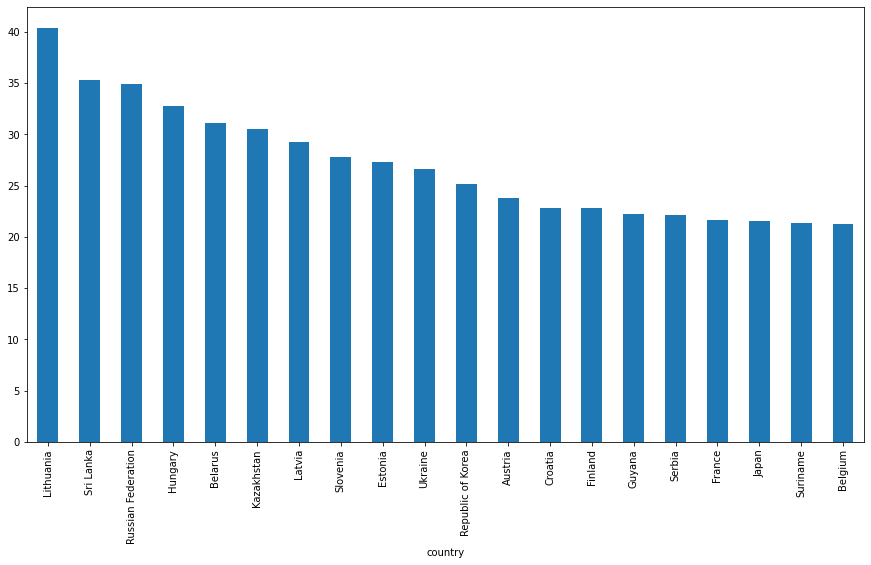

In [6]:
dfMediaSuicidosPorPaises.nlargest(20).plot.bar(figsize=(15,8))

##### Vamos a estudiar más a fondo estos países, empezando por Lituania. Observamos que los datos comienzan en 1995 y como veremos más adelante, en otra parte de nuestro estudio, el índice de suicidio desciende conforme van pasando los años. 

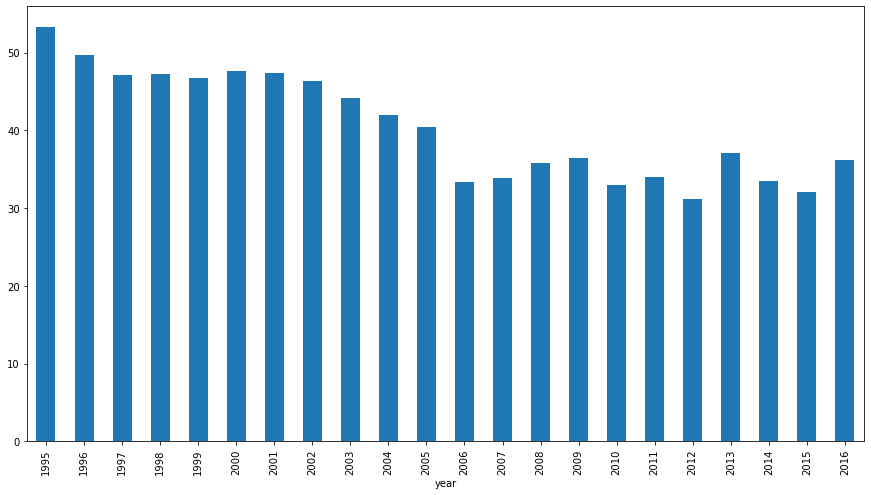

In [7]:
Lithuania_Study = data.loc[data['country'] == 'Lithuania'];
Lithuania_Study = Lithuania_Study.groupby('year')['suicides/100k pop'].mean()

Lithuania_Study.plot.bar(figsize=(15,8))

#### De Rusia tenemos datos desde algo anteriores a los de Lituania, desde 1989, dos años antes de la dilución de la Unión Soviética. A partir de 1991 hay un fuerte crecimiento en el número de suicidios, debido a la crisis política y económica. Después, esta tasa va descendiendo según se van estabilizando la política y la economía como veremos en el siguiente gráfico.

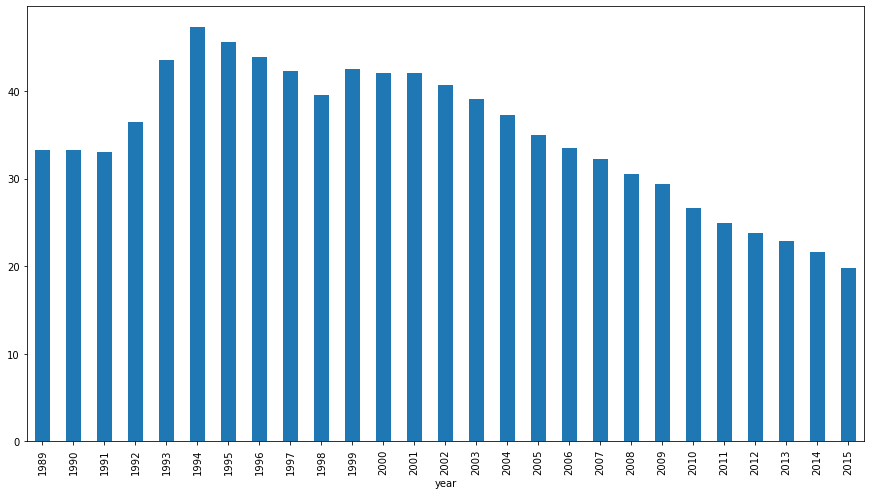

In [8]:
Russian_Federation = data.loc[data['country'] == 'Russian Federation'];
Russian_Federation = Russian_Federation.groupby('year')['suicides/100k pop'].mean()

Russian_Federation.plot.bar(figsize=(15,8))

##### El PIB per cápita asciende a un ritmo alto a partir de 2001, coincidiendo con la bajada del índice de suicidio, aunque esta no desciende a un ritmo tan alto. Puede existir una relación, pero hemos llegado a la conclusión de que el PIB per cápita o el PIB, no es un reflejo demasiado fiel a la hora de ver la forma de vida de un país, ya que, aunque un país genere mucha riqueza el PIB per cápita solo es una división de la riqueza entre la población. Por lo tanto, como ya sabemos, la mayor parte de la riqueza es poseída por unos pocos, mientras que las condiciones de la mayoría varían levemente.
##### En conclusión, en el análisis de Rusia, el PIB puede ser importante, pero no tan decisivo como en un primer momento sospechábamos. No hemos podido estudiar el HDI porque no hay datos de Rusia.

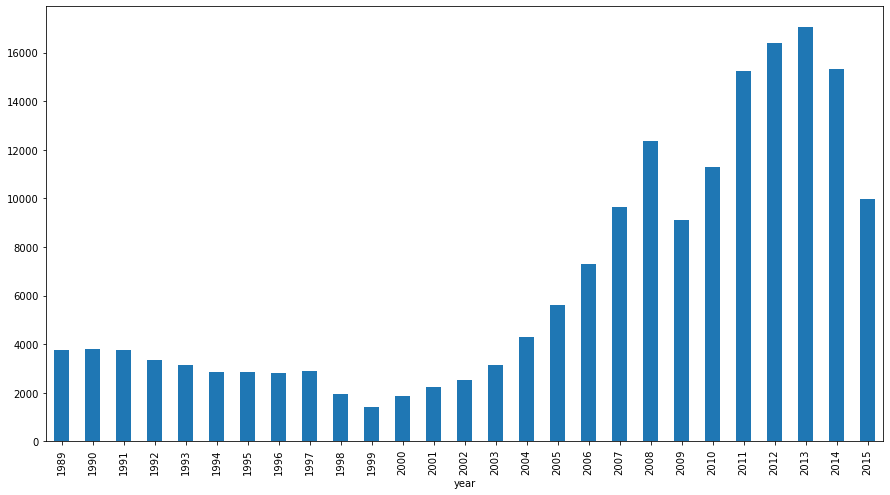

In [9]:
Russian_Federation = data.loc[data['country'] == 'Russian Federation']
Russian_Federation = Russian_Federation.rename(columns={' gdp_for_year ($) ': 'gdp_for_year', 'gdp_per_capita ($)': 'gdp_per_capita'})
Russian_Federation = Russian_Federation.groupby('year')['gdp_per_capita'].mean()
Russian_Federation.plot.bar(figsize=(15,8))

## Estudio de países con menor índice de suicidio
#### Ahora, continuamos con el análisis de los países con menor tasa de suicidios. Vemos que existe un grupo de países caribeños como Jamaica, Antigua y Barbuda, San Cristóbal y Nieves... estos países suelen tener un PIB bajo y una densidad de población moderada acercándonos a alta y un HDI bajo.
#### Hay otro grupo de países árabes muy ricos que también se encuentran en esta clasificación. Entre ellos Emiratos Árabes o Catar, con un PIB no demasiado alto, pero con un PIB per cápita altísimo.

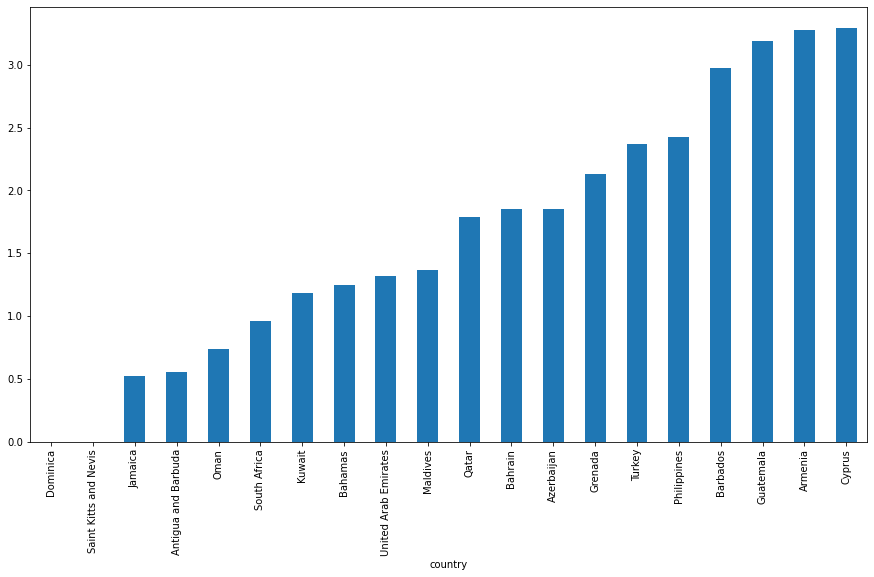

In [10]:
dfMediaSuicidosPorPaises.nsmallest(20).plot.bar(figsize=(15,8))

#### El PIB en Jamaica a aumentado, al igual que el de la mayoría de estos países, su situación económica se ha mantenido más o menos estable, así como el número de suicidios.

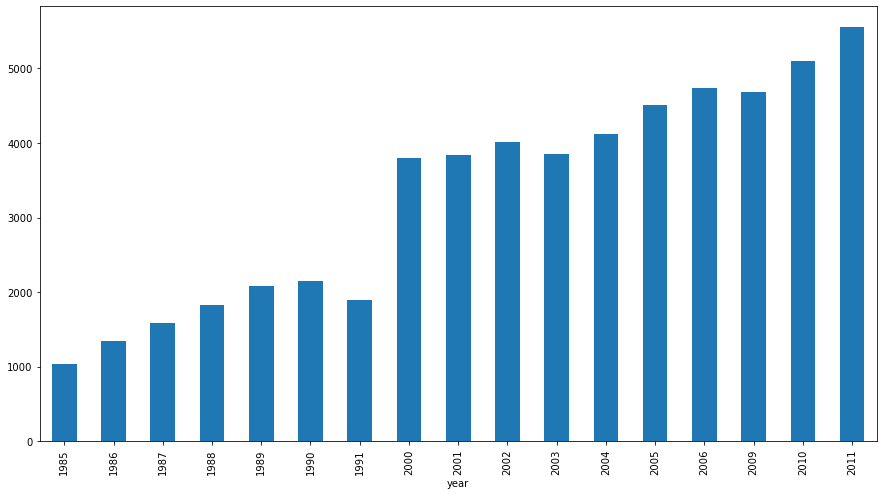

In [11]:
Jamaica = data.loc[data['country'] == 'Jamaica']
Jamaica = Jamaica.rename(columns={' gdp_for_year ($) ': 'gdp_for_year', 'gdp_per_capita ($)': 'gdp_per_capita'})
Jamaica = Jamaica.groupby('year')['gdp_per_capita'].mean()
Jamaica.plot.bar(figsize=(15,8))

In [12]:
############################################ Piensa en algo ########################################

#### El análisis por género lo abordaremos más detalladamente más adelante.

In [13]:
data.groupby('sex').max()

,country,year,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
sex,,,,,,,,,,,
female,Uzbekistan,2016,75+ years,4053,43805214,133.42,Uzbekistan2014,0.944,"997,007,926",126352,Silent
male,Uzbekistan,2016,75+ years,22338,43139910,224.97,Uzbekistan2014,0.944,"997,007,926",126352,Silent


### Análisis de grupos de edad
#### Debemos aclarar que una cosa son las franjas de edad y otra son las generaciones, cada generación tiene o tendrá todos los grupos de edad. 
#### Aquí el resultado varía mucho dependiendo del punto de vista. Si nos preguntamos cual es la franja de edad con mayor número de suicidios, es la de 35 a 54, pero porque la población que pertenece a ese grupo es mucho mayor que la población que tiene más de 75 años.
#### Porcentualmente, el grupo que más suicidios tiene en relación con el número de personas que lo forman es el de mayores de 75. 
#### Lo que nos hace preguntarnos, ¿las personas que lo cometen presentan estas tendencias toda su vida? o se debe a las circunstancias.

In [14]:
data_age = data.groupby('age')['suicides_no'].mean()

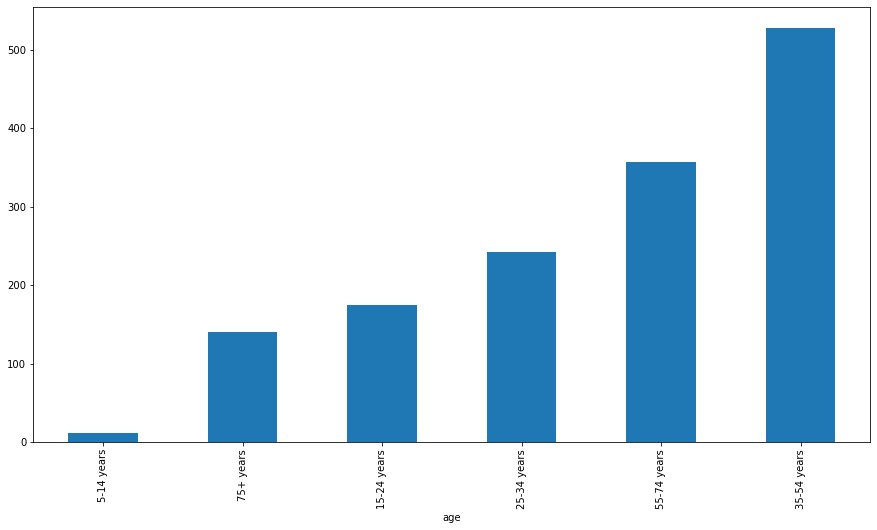

In [15]:
data_age.nsmallest(6).plot.bar(figsize=(15,8))

In [16]:
data_age = data.groupby('age')['suicides/100k pop'].mean()

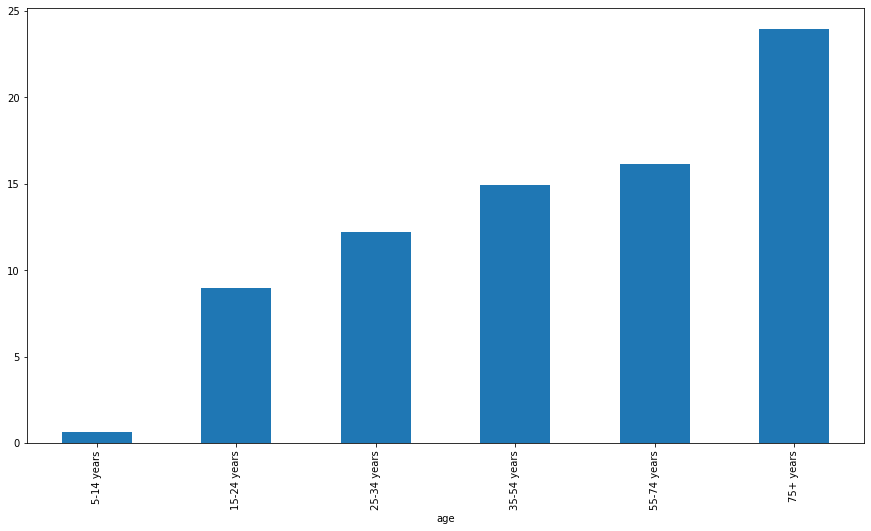

In [17]:
data_age.nsmallest(6).plot.bar(figsize=(15,8))

### Análisis de grupos de edad a lo largo de los años
#### Encontramos que estos grupos en ningún momento se cortan entre ellos, mantienen tendencias muy parecidas, cuando uno crece el otro también lo hace y viceversa. Lo que nos indica que aproximadamente a todos afecta por igual las circunstancias. También podemos ver que existe una tendencia a disminuir hacia abajo.

<ipython-input-30-741624293340>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Edad = data.groupby(["year","age"])["suicides_no", "population"].sum()


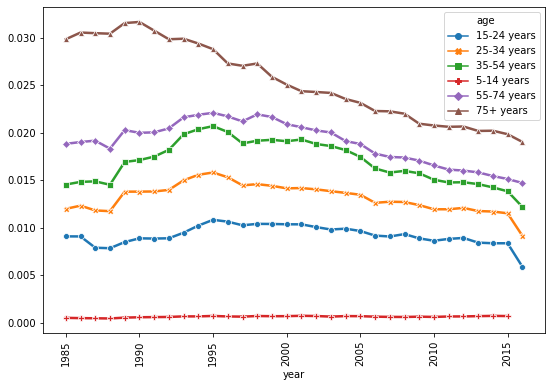

In [30]:
Edad = data.groupby(["year","age"])["suicides_no", "population"].sum()
Auxiliar = Edad.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", Auxiliar.suicides_no*100/Auxiliar.population, hue = "age",data = Auxiliar, linewidth = 2.5, style = "age", markers=True, dashes=False)
plt.xticks(rotation = 90)
plt.show()

### Análisis de Generaciones
#### En este análisis confirmamos que existe una tendencia a la baja de suicidios según van pasando los años. Pero es un análisis parcial, ya que aunque tenemos todos los datos de la generación G.I. y casi todos los de Silent, quedan tres generaciones que aún son muy jóvenes como para poder asegurar nada, especialmente los millenials y la generación Z.

In [19]:
data_generation = data.groupby('generation')['suicides/100k pop'].mean()

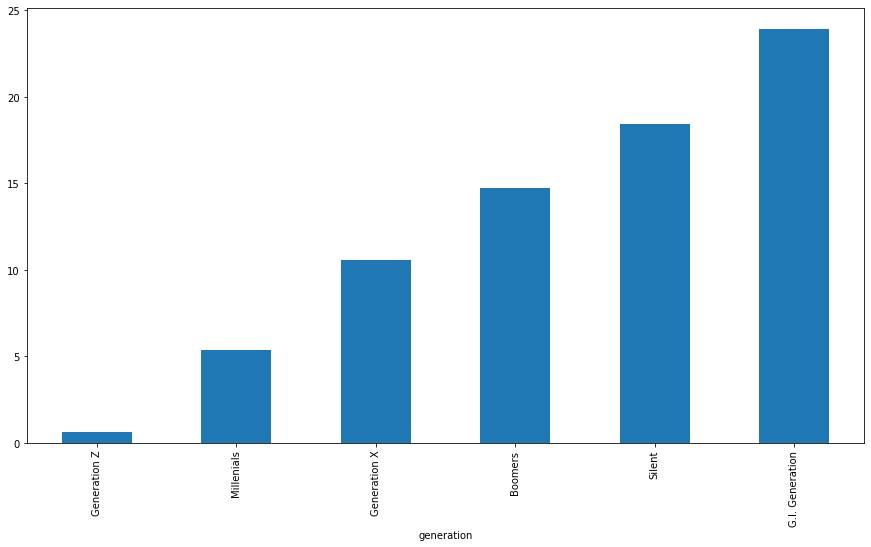

In [20]:
data_generation.nsmallest(6).plot.bar(figsize=(15,8))

#### Volvemos a ver lo mismo, según van pasando los años en cada generación el número de suicidios aumenta, porque como hemos visto, el número de individuos aumenta desde los 15 hasta los 54 y después vuelve a descender.

<ipython-input-32-08c60dcd1e49>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Generacion = data.groupby(["year","generation"])["suicides_no", "population"].sum()


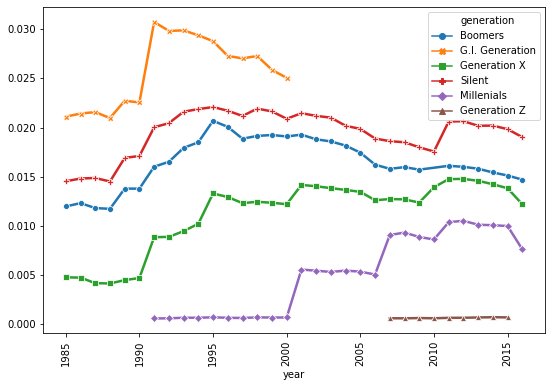

In [32]:
Generacion = data.groupby(["year","generation"])["suicides_no", "population"].sum()
Auxiliar = Generacion.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", Auxiliar.suicides_no*100/Auxiliar.population, hue = "generation",data = Auxiliar, linewidth = 2.5, style = "generation", markers=True, dashes=False)
plt.xticks(rotation = 90)
plt.show()

### Experimento 1: ¿Coinciden las épocas de crisis con una mayor tasa de suicidios?
#### Para eso buscamos los años donde se han cometido más suicidios. pensábamos que en épocas de crisis políticas o económicas serían las más propensas a que se cometiesen este tipo de actos. 
#### En la siguiente gráfica hemos ordenado los países y los años con mayor número de individuos muertos por cada 100.000 habitantes.
#### Vemos que Hungría en la década de los 90 aparece repetida varias veces, creemos que puede tener que ver el cambio de paradigma político, de nuevo observamos una transición de un modelo comunista tipo soviético a un modelo de democracia occidental, a pesar de haber sido una transición relativamente discreta, la implantación de un nuevo sistema económico y político es algo muy complicado, lo que pudo ser una de las causas del aumento de la tasa.

<ipython-input-22-2f2ee73e08f9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_age = data.groupby(["country", "year"])["suicides/100k pop", "country-year"].max()


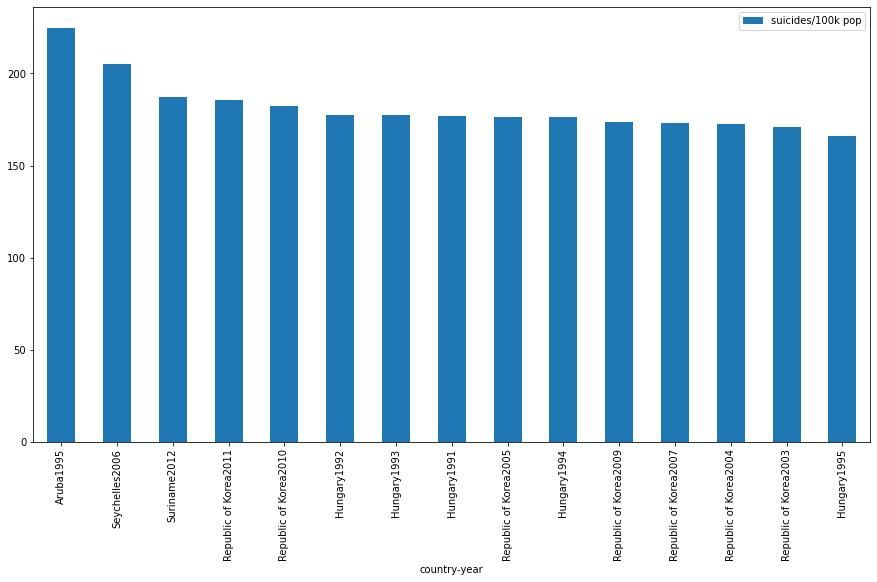

In [22]:
df_age = data.groupby(["country", "year"])["suicides/100k pop", "country-year"].max()


aux = pd.DataFrame(df_age)
aux.nlargest(15, "suicides/100k pop").plot.bar(figsize=(15,8),x="country-year", y='suicides/100k pop')


### Experimento 2: estudios de PIB per cápita y número de suicidios

#### Tratamos de ver si existe una relación directa entre el PIB per cápita y la tasa de suicidios, lo estudiaremos de dos formas diferentes, buscaremos si existe algún patrón en las gráficas y por supuesto también realizaremos una matriz de correlación. 
#### En el primer paso, creamos una gráfica de barras cuya ‘x’ está formada por los valores del PIB per cápita de menor a mayor y cuya ‘y’ por los valores de número de suicidios por cada 100.000 habitantes de dicho país. Pronto nos damos cuenta de que no hay ningún patrón, como ya habíamos adelantado antes.

<ipython-input-23-f2303e8b1724>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_gdp_capita = data.groupby('country')['gdp_per_capita ($)', 'suicides/100k pop'].mean()


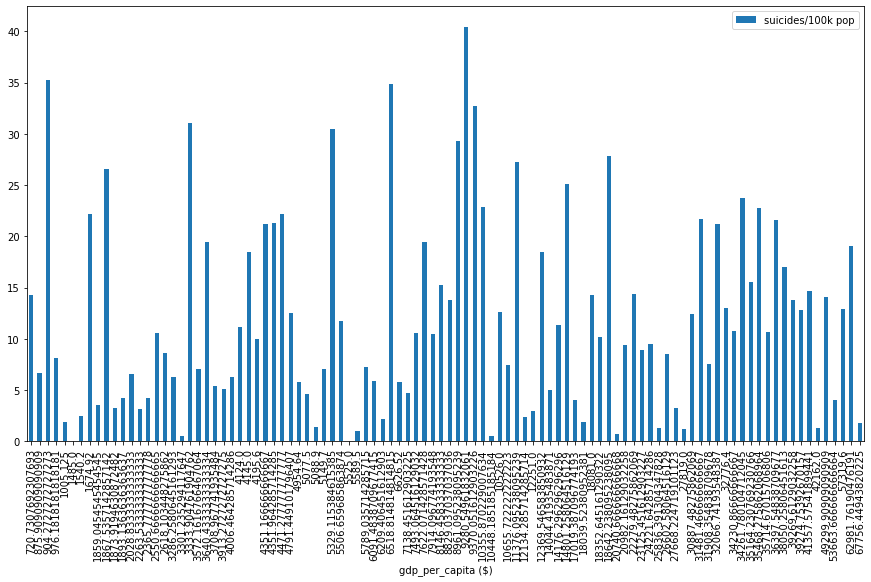

In [23]:
data_gdp_capita = data.groupby('country')['gdp_per_capita ($)', 'suicides/100k pop'].mean()
data_gdp_capita.nsmallest(100, 'gdp_per_capita ($)').plot.bar(x='gdp_per_capita ($)', y='suicides/100k pop',figsize=(15,8))

#### En este segundo paso hemos medido la correlación entre estos dos valores y confirmamos que no tiene mucho que ver.

In [24]:
data_gdp_capita.corr()

,gdp_per_capita ($),suicides/100k pop
gdp_per_capita ($),1.000000,0.038206
suicides/100k pop,0.038206,1.000000


#### Por último, observamos si la desviación típica y el índice de suicidio tienen algún tipo de relación, y vemos que algo más que el anterior, pero sigue siendo una relación muy débil.

In [25]:
data_std = data.groupby('country')['gdp_per_capita ($)', 'suicides/100k pop'].std()
data_std.corr()

<ipython-input-25-ad9d5c267ae1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_std = data.groupby('country')['gdp_per_capita ($)', 'suicides/100k pop'].std()


,gdp_per_capita ($),suicides/100k pop
gdp_per_capita ($),1.000000,0.086533
suicides/100k pop,0.086533,1.000000


#### Hemos pensado que una matriz de correlación nos ayudaría a continuar nuestro análisis con los algoritmos.
#### La matriz nos muestra que no hay correlación en los datos de este dataset, lo que nos hace sospechar que el suicidio es algo que no se puede medir solo con los datos que tenemos. Hemos leído artículos acerca de esto, y el libro "El suicidio" de Durkheim, a pesar de tener más de 120 años y debemos tomar sus datos con relativo cuidado, apunta a que el suicidio tiene mucho que ver con causas extra sociales, herencia, estados psicopáticos... y en cuanto a cuestiones sociales, tienen mucho que ver causas que no podemos medir adecuadamente, como la religión, la política, o la educación, algunos de los países con mejor formación académica son también aquellos que más individuos se suicidan.
#### Por último, como apunte, la población masificada parece afectar más al índice de natalidad a la tasa de suicidio.

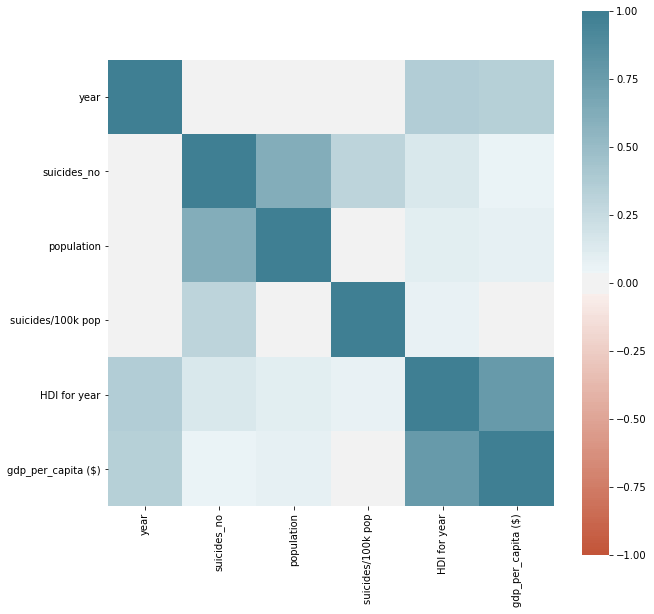

In [26]:
corr=data.corr()
f,ax = plt.subplots(figsize=(10,10))

ax = sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)